In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats

In [2]:
housing = pd.read_csv(r'.\zestaw_danych\mieszkania\housing.csv')
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

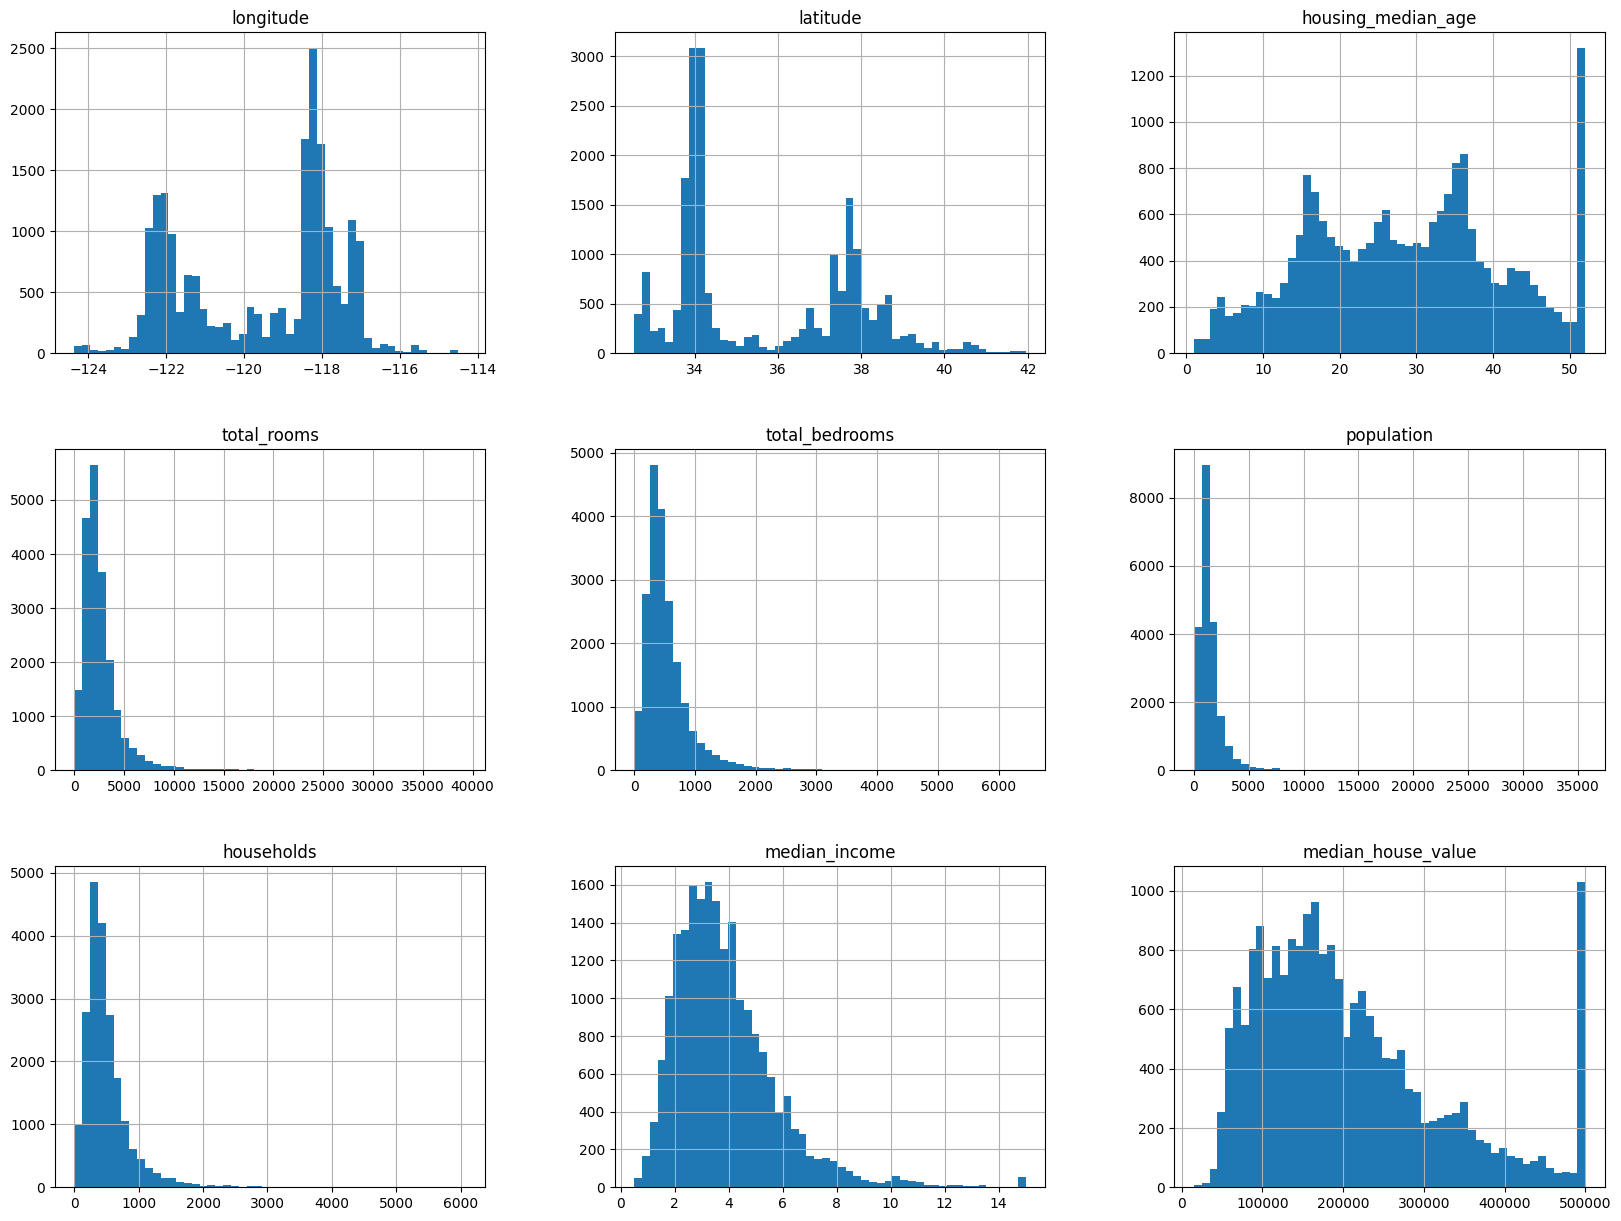

In [6]:
housing.hist(bins = 50, figsize=(20,15))
plt.show()

### Notations:
- median_income: 
    - 1 --> 10 000$, 
    - 3 --> 30 000$

<AxesSubplot: >

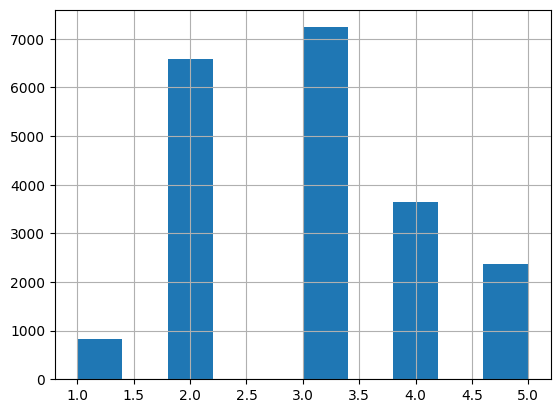

In [7]:
housing["income_cat"] = pd.cut(housing["median_income"],
                        bins = [0., 1.5, 3., 4.5, 6., np.inf],
                        labels=[1, 2, 3, 4, 5])  
housing["income_cat"].hist()                                              

In [8]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [9]:
test_set["income_cat"].value_counts() / len(test_set["income_cat"])

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [10]:
train_set["income_cat"].value_counts() / len(train_set["income_cat"])

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64

In [11]:
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

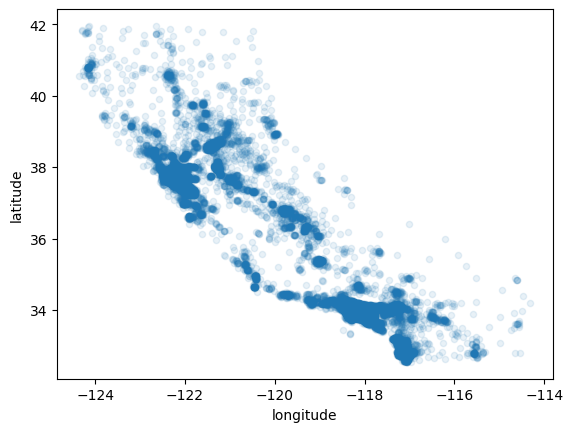

In [12]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

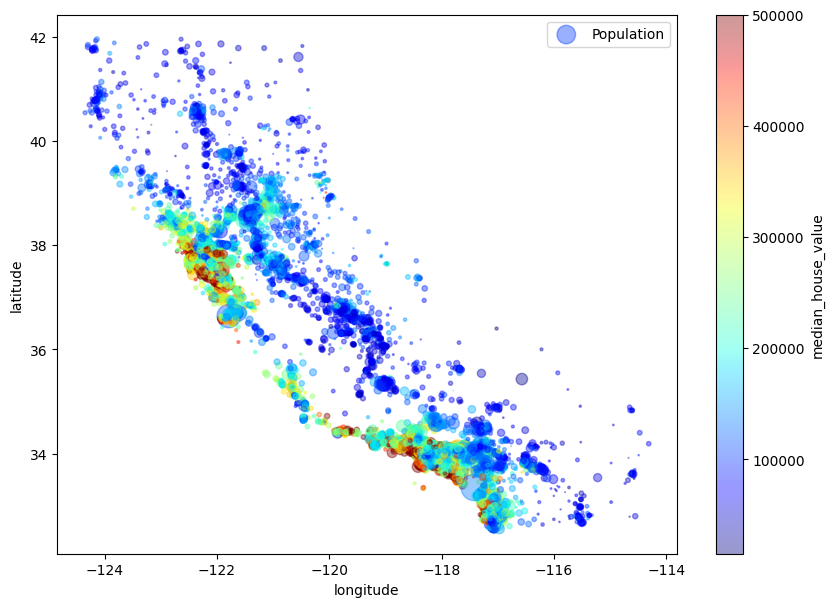

In [13]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s = train_set["population"]/100, label="Population", figsize=(10,7),
                c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [14]:
corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3940\1663339276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

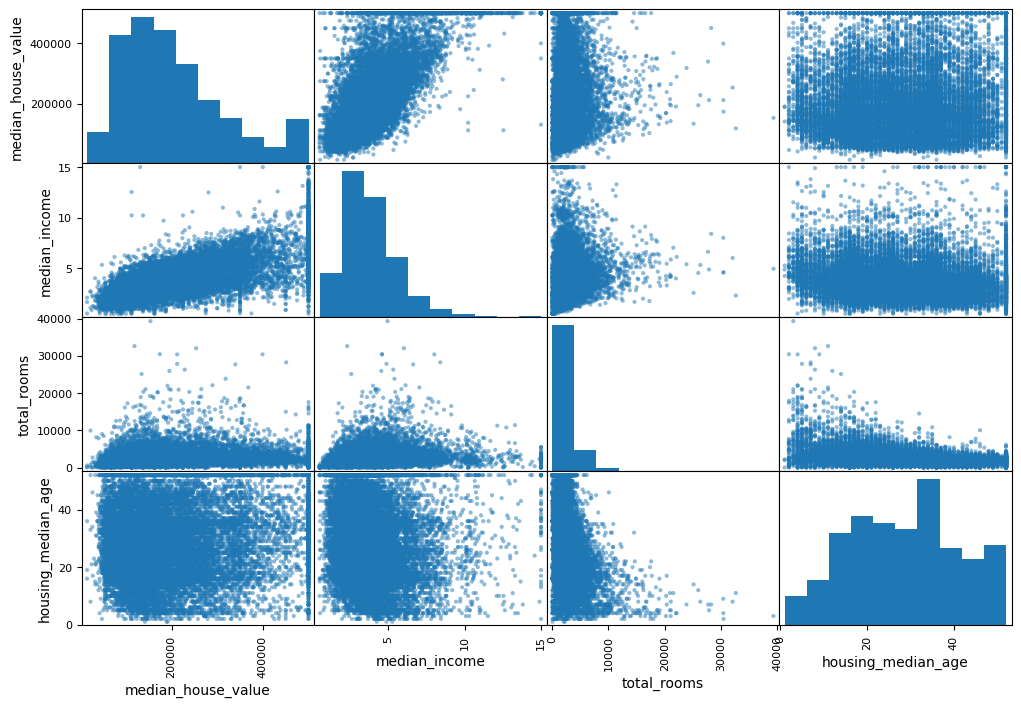

In [15]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(train_set[attributes], figsize=(12,8))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

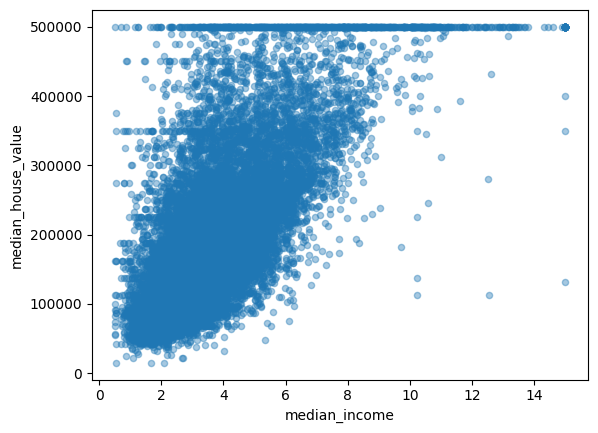

In [16]:
train_set.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4)

In [17]:
train_set["rooms_per_households"] = train_set['total_rooms']/train_set["households"]
train_set["bedrooms_per_rooms"] = train_set['total_bedrooms']/train_set["total_rooms"]
train_set["population_per_households"] = train_set['population']/train_set["households"]

test_set["rooms_per_households"] = test_set['total_rooms']/test_set["households"]
test_set["bedrooms_per_rooms"] = test_set['total_bedrooms']/test_set["total_rooms"]
test_set["population_per_households"] = test_set['population']/test_set["households"]

corr_matrix = train_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3940\853986778.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


median_house_value           1.000000
median_income                0.690647
rooms_per_households         0.158485
total_rooms                  0.133989
housing_median_age           0.103706
households                   0.063714
total_bedrooms               0.047980
population_per_households   -0.022030
population                  -0.026032
longitude                   -0.046349
latitude                    -0.142983
bedrooms_per_rooms          -0.257419
Name: median_house_value, dtype: float64

In [18]:
X_train = train_set.drop("median_house_value", axis=1)
Y_train = train_set["median_house_value"].copy()

X_test = test_set.drop("median_house_value", axis=1)
Y_test = test_set["median_house_value"].copy()
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

print(f"\nX_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (16512, 12)
Y_train shape: (16512,)

X_test shape: (4128, 12)
Y_test shape: (4128,)


In [19]:
# median_total_bedrooms = X_train["total_bedrooms"].median()
# X_train['total_bedrooms'] = X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].median())
# X_test['total_bedrooms'] = X_test['total_bedrooms'].fillna(X_test['total_bedrooms'].median())
# X_train.info()

In [20]:
X_train["ocean_proximity"].head(10)

14196    NEAR OCEAN
8267     NEAR OCEAN
17445    NEAR OCEAN
14265    NEAR OCEAN
2271         INLAND
17848     <1H OCEAN
6252      <1H OCEAN
9389       NEAR BAY
6113      <1H OCEAN
6061      <1H OCEAN
Name: ocean_proximity, dtype: object

In [21]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

In [22]:
num_features = list(X_train.drop("ocean_proximity", axis=1).columns)
cat_features = ["ocean_proximity"]

In [24]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])
X_train_prepared = full_pipeline.fit_transform(X_train)

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, Y_train)

predictions = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(Y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67593.20745775253

In [26]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prepared, Y_train)

predictions = tree_reg.predict(X_train_prepared)
tree_mse = mean_squared_error(Y_train, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [27]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_prepared, Y_train)

predictions = forest_reg.predict(X_train_prepared)
forest_mse = mean_squared_error(Y_train, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18607.077855582647

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train_prepared, Y_train, scoring="neg_mean_squared_error", cv=10) 
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

68461.13628524265

In [29]:
scores = cross_val_score(lin_reg, X_train_prepared, Y_train, scoring="neg_mean_squared_error", cv=10) 
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores.mean()

67828.46755308326

In [30]:
scores = cross_val_score(forest_reg, X_train_prepared, Y_train, scoring="neg_mean_squared_error", cv=10) 
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores.mean()

49708.30678907172

In [31]:
hyperparameters = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
ranodm_search = RandomizedSearchCV(forest_reg, param_distributions=hyperparameters,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=2)
ranodm_search.fit(X_train_prepared, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................max_features=7, n_estimators=180; total time=  29.9s
[CV] END ...................max_features=7, n_estimators=180; total time=  28.5s
[CV] END ...................max_features=7, n_estimators=180; total time=  28.1s
[CV] END ...................max_features=7, n_estimators=180; total time=  29.5s
[CV] END ...................max_features=7, n_estimators=180; total time=  26.4s
[CV] END ....................max_features=5, n_estimators=15; total time=   1.4s
[CV] END ....................max_features=5, n_estimators=15; total time=   1.4s
[CV] END ....................max_features=5, n_estimators=15; total time=   1.6s
[CV] END ....................max_features=5, n_estimators=15; total time=   1.4s
[CV] END ....................max_features=5, n_estimators=15; total time=   1.3s
[CV] END ....................max_features=3, n_estimators=72; total time=   5.5s
[CV] END ....................max_features=3, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013F22BE0F50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013F1E9CD290>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
cvres = ranodm_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49092.33537949845 {'max_features': 7, 'n_estimators': 180}
51605.96601433476 {'max_features': 5, 'n_estimators': 15}
50107.96559074184 {'max_features': 3, 'n_estimators': 72}
50576.80117394457 {'max_features': 5, 'n_estimators': 21}
49181.82405685479 {'max_features': 7, 'n_estimators': 122}
50135.149663243035 {'max_features': 3, 'n_estimators': 75}
50006.03961790912 {'max_features': 3, 'n_estimators': 88}
49446.111567592656 {'max_features': 5, 'n_estimators': 100}
49884.086748836206 {'max_features': 3, 'n_estimators': 150}
64823.30106197093 {'max_features': 5, 'n_estimators': 2}


In [37]:
feature_importances = ranodm_search.best_estimator_.feature_importances_
feature_importances

array([7.03072710e-02, 6.47536370e-02, 4.15933043e-02, 1.58834571e-02,
       1.51444705e-02, 1.57784481e-02, 1.46170496e-02, 3.55222735e-01,
       5.16101333e-02, 7.40290367e-02, 1.12449567e-01, 8.63166970e-03,
       1.52334004e-01, 1.76277874e-04, 3.32597557e-03, 4.14296315e-03])

In [40]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_features + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3552227352659798, 'median_income'),
 (0.15233400415180637, 'INLAND'),
 (0.11244956673219779, 'population_per_households'),
 (0.07402903669295637, 'bedrooms_per_rooms'),
 (0.0703072710213212, 'longitude'),
 (0.06475363699751643, 'latitude'),
 (0.05161013328232603, 'rooms_per_households'),
 (0.041593304263867044, 'housing_median_age'),
 (0.01588345711149496, 'total_rooms'),
 (0.015778448086131106, 'population'),
 (0.015144470528870635, 'total_bedrooms'),
 (0.014617049570020513, 'households'),
 (0.008631669700206575, '<1H OCEAN'),
 (0.0041429631521224895, 'NEAR OCEAN'),
 (0.003325975569069662, 'NEAR BAY'),
 (0.00017627787411304466, 'ISLAND')]

In [45]:
final_model = ranodm_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48432.15006057675

### Confidence Intervals

In [48]:
confidence = 0.95
squared_errors = (final_predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46208.8362127 , 50557.78649079])